In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

## Ejemplo 4.1 Ecuaclón del salario por hora (wage1.dta)

In [7]:
dfej4_1= pd.read_stata('wage1.dta')
dfej4_1.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


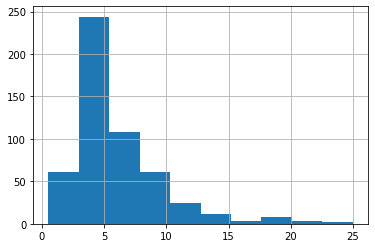

In [10]:
dfej4_1.wage.hist()

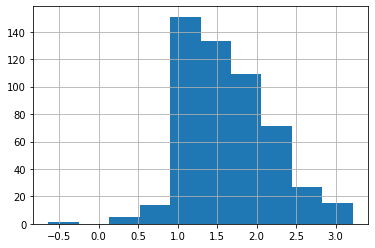

In [11]:
dfej4_1.lwage.hist()

In [4]:
regdfej4_1 = smf.ols('np.log(wage) ~ educ + exper + tenure ', data = dfej4_1).fit() 
print(regdfej4_1.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     80.39
Date:                Wed, 02 Sep 2020   Prob (F-statistic):           9.13e-43
Time:                        11:49:49   Log-Likelihood:                -313.55
No. Observations:                 526   AIC:                             635.1
Df Residuals:                     522   BIC:                             652.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2844      0.104      2.729      0.0

In [5]:
# test de significatividad de exper
hypotheses = 'exper=0'
regdfej4_1.t_test(hypotheses)

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0041      0.002      2.391      0.017       0.001       0.008

## Ejemplo 4.2 Rendimiento escolar y tmaño de la escuela (meap93.dta)

In [7]:
dfej4_2= pd.read_stata('meap93.dta')
dfej4_2.head()

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,math10,sci11,totcomp,ltotcomp,lexpend,lenroll,lstaff,bensal,lsalary
0,1.4,1862,112.599998,5765,37498.0,7420,2.9,89.199997,56.400002,67.900002,44918.0,10.712594,8.659560,7.529407,4.723842,0.197877,10.532043
1,2.3,11355,101.199997,6601,48722.0,10370,1.3,91.400002,42.700001,65.300003,59092.0,10.986851,8.794976,9.337414,4.617099,0.212840,10.793886
2,2.7,7685,114.000000,6834,44541.0,7313,3.5,91.400002,43.799999,54.299999,51854.0,10.856188,8.829665,8.947025,4.736198,0.164186,10.704165
3,3.4,1148,85.400002,3586,31566.0,5989,3.6,86.599998,25.299999,60.000000,37555.0,10.533562,8.184793,7.045776,4.447346,0.189729,10.359836
4,3.4,1572,96.099998,3847,29781.0,5545,0.0,100.000000,15.300000,65.800003,35326.0,10.472375,8.255049,7.360104,4.565389,0.186193,10.301626


In [8]:
regdfej4_2 = smf.ols('math10 ~ totcomp + staff + enroll ', data = dfej4_2).fit() 
print(regdfej4_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 math10   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     7.697
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           5.18e-05
Time:                        14:58:01   Log-Likelihood:                -1526.2
No. Observations:                 408   AIC:                             3060.
Df Residuals:                     404   BIC:                             3076.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2740      6.114      0.372      0.7

## Ejemplo 4.3 Determinantes de la nota media en la universidad (gpa1.dta)

In [9]:
dfej4_3= pd.read_stata('gpa1.dta')
dfej4_3.head()

,age,soph,junior,senior,senior5,male,campus,business,engineer,colGPA,...,greek,car,siblings,bgfriend,clubs,skipped,alcohol,gradMI,fathcoll,mothcoll
0,21,0,0,1,0,0,0,1,0,3.0,...,0,1,1,0,0,2.0,1.0,1,0,0
1,21,0,0,1,0,0,0,1,0,3.4,...,0,1,0,1,1,0.0,1.0,1,1,1
2,20,0,1,0,0,0,0,1,0,3.0,...,0,1,1,0,1,0.0,1.0,1,1,1
3,19,1,0,0,0,1,1,1,0,3.5,...,0,0,1,0,0,0.0,0.0,0,0,0
4,20,0,1,0,0,0,0,1,0,3.6,...,0,1,1,1,0,0.0,1.5,1,1,0


In [10]:
regdfej4_3 = smf.ols('colGPA ~ hsGPA + ACT + skipped ', data = dfej4_3).fit() 
print(regdfej4_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     13.92
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           5.65e-08
Time:                        14:59:45   Log-Likelihood:                -41.501
No. Observations:                 141   AIC:                             91.00
Df Residuals:                     137   BIC:                             102.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3896      0.332      4.191      0.0

## Ejemplo 4.4 Delincuencia en los campus universitarios y matrícula (campus.raw)

In [3]:
dfej4_4= pd.read_stata('campus.dta')
dfej4_4.head()

,enroll,priv,police,crime,lcrime,lenroll,lpolice
0,21836.0,0,24,446,6.100319,9.991315,3.178054
1,6485.0,0,13,1,0.000000,8.777247,2.564949
2,2123.0,0,3,1,0.000000,7.660585,1.098612
3,8240.0,0,17,121,4.795791,9.016756,2.833213
4,19793.0,0,30,470,6.152733,9.893084,3.401197


In [6]:
regdfej4_4 = smf.ols('np.log(crime) ~ np.log(enroll) ', data = dfej4_4).fit() 
print(regdfej4_4.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(crime)   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     133.8
Date:                Thu, 26 Aug 2021   Prob (F-statistic):           7.83e-20
Time:                        14:47:50   Log-Likelihood:                -125.83
No. Observations:                  97   AIC:                             255.7
Df Residuals:                      95   BIC:                             260.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -6.6314      1.034     -6.

In [5]:
hypotheses = 'np.log(enroll) = 1.0'
t_test = regdfej4_4.t_test(hypotheses)
print(t_test)   

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.2698      0.110      2.457      0.016       1.052       1.488


## Ejemplo 4.5 Precio de la vivienda y contamlnación del aire (hprice2.dta)

In [14]:
dfej4_5= pd.read_stata('hprice2.dta')
dfej4_5.head()

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax
0,24000.0,0.006,5.38,6.57,4.09,1,29.600000,15.300000,4.98,10.085809,1.682688,5.690360
1,21599.0,0.027,4.69,6.42,4.97,2,24.200001,17.799999,9.14,9.980402,1.545433,5.488938
2,34700.0,0.027,4.69,7.18,4.97,2,24.200001,17.799999,4.03,10.454495,1.545433,5.488938
3,33400.0,0.032,4.58,7.00,6.06,3,22.200001,18.700001,2.94,10.416311,1.521699,5.402678
4,36199.0,0.069,4.58,7.15,6.06,3,22.200001,18.700001,5.33,10.496787,1.521699,5.402678


In [15]:
regdfej4_5 = smf.ols('np.log(price) ~ np.log(nox)+ np.log(dist)+ rooms + stratio ', data = dfej4_5).fit() 
print(regdfej4_5.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     175.9
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           5.53e-94
Time:                        15:22:20   Log-Likelihood:                -43.495
No. Observations:                 506   AIC:                             96.99
Df Residuals:                     501   BIC:                             118.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       11.0839      0.318     34.843   

## Ejemplo 4.6 Tasas de participaclón en los planes gubernamentales de penslones (401k.dta)

In [16]:
dfej4_6= pd.read_stata('401k.dta')
dfej4_6.head()

,prate,mrate,totpart,totelg,age,totemp,sole,ltotemp
0,26.100000,0.21,1653.0,6322.0,8,8709.0,0,9.072112
1,100.000000,1.42,262.0,262.0,6,315.0,1,5.752573
2,97.599998,0.91,166.0,170.0,10,275.0,1,5.616771
3,100.000000,0.42,257.0,257.0,7,500.0,0,6.214608
4,82.500000,0.53,591.0,716.0,28,933.0,1,6.838405


In [17]:
regdfej4_6 = smf.ols('prate ~ mrate + age + totemp ', data = dfej4_6).fit() 
print(regdfej4_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  prate   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     56.38
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           1.45e-34
Time:                        15:23:58   Log-Likelihood:                -6416.1
No. Observations:                1534   AIC:                         1.284e+04
Df Residuals:                    1530   BIC:                         1.286e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.2941      0.778    103.242      0.0

## Ejemplo 4.7 Efecto de las ayudas a la formación laboral sobre la tasa de desecho de las empresas (jtrain.dta)

In [18]:
dfej4_7= pd.read_stata('jtrain.dta')
dfej4_7.head()

,year,fcode,employ,sales,avgsal,scrap,rework,tothrs,union,grant,...,grant_1,clscrap,cgrant,clemploy,clsales,lavgsal,clavgsal,cgrant_1,chrsemp,clhrsemp
0,1987,410032.0,100.0,47000000.0,35000.0,NaN,NaN,12.0,0,0,...,0,NaN,0,NaN,NaN,10.463103,NaN,NaN,NaN,NaN
1,1988,410032.0,131.0,43000000.0,37000.0,NaN,NaN,8.0,0,0,...,0,NaN,0,0.270027,-0.088949,10.518673,0.055570,0.0,-8.946565,-1.165385
2,1989,410032.0,123.0,49000000.0,39000.0,NaN,NaN,8.0,0,0,...,0,NaN,0,-0.063013,0.130621,10.571317,0.052644,0.0,0.198597,0.047832
3,1987,410440.0,12.0,1560000.0,10500.0,NaN,NaN,12.0,0,0,...,0,NaN,0,NaN,NaN,9.259130,NaN,NaN,NaN,NaN
4,1988,410440.0,13.0,1970000.0,11000.0,NaN,NaN,12.0,0,0,...,0,NaN,0,0.080043,0.233347,9.305651,0.046520,0.0,0.000000,0.000000


In [20]:
# Se filtra la base para el año 1987
dfej4_787= dfej4_7[dfej4_7.year == 1987]

In [23]:
regdfej4_7 = smf.ols('np.log(scrap) ~ hrsemp + np.log(sales) + np.log(employ) ', data = dfej4_787).fit() 
print(regdfej4_7.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(scrap)   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     5.838
Date:                Sat, 11 Jul 2020   Prob (F-statistic):            0.00215
Time:                        16:07:23   Log-Likelihood:                -70.198
No. Observations:                  43   AIC:                             148.4
Df Residuals:                      39   BIC:                             155.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.7443      4.575      2.

## Ejemplo 4.8 Modelo de precio hedónico para la vivienda¶

## Ejemplo 4.9 La educación de los padres en una ecuación del peso de los recién nacidos (bwght.dta)

In [7]:
dfej4_9= pd.read_stata('bwght.dta')
dfej4_9.head()

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
0,13.5,16.5,122.300003,109,12.0,12.0,1,1,1,0,4.691348,6.8125,0.0,2.602690
1,7.5,16.5,122.300003,133,6.0,12.0,2,1,0,0,4.890349,8.3125,0.0,2.014903
2,0.5,16.5,122.300003,129,NaN,12.0,2,0,0,0,4.859812,8.0625,0.0,-0.693147
3,15.5,16.5,122.300003,126,12.0,12.0,2,1,0,0,4.836282,7.8750,0.0,2.740840
4,27.5,16.5,122.300003,134,14.0,12.0,2,1,1,0,4.897840,8.3750,0.0,3.314186


In [8]:
regdfej4_9 = smf.ols('bwght ~ cigs + parity + faminc + motheduc + fatheduc ', data = dfej4_9).fit() 
print(regdfej4_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     9.553
Date:                Thu, 26 Aug 2021   Prob (F-statistic):           5.99e-09
Time:                        15:25:38   Log-Likelihood:                -5242.2
No. Observations:                1191   AIC:                         1.050e+04
Df Residuals:                    1185   BIC:                         1.053e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.5243      3.728     30.716      0.0

In [9]:
hypotheses = '(motheduc = 0),(fatheduc=0)'
f_test = regdfej4_9.f_test(hypotheses)    
print (f_test)

<F test: F=array([[1.43726864]]), p=0.23798962194786966, df_denom=1185, df_num=2>


## Ejemplo 4.10 Tradeoffentre salario y pensión para los profesores (meap93.dta)

In [26]:
dfej4_10= pd.read_stata('meap93.dta')
dfej4_10.head()

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,math10,sci11,totcomp,ltotcomp,lexpend,lenroll,lstaff,bensal,lsalary
0,1.4,1862,112.599998,5765,37498.0,7420,2.9,89.199997,56.400002,67.900002,44918.0,10.712594,8.659560,7.529407,4.723842,0.197877,10.532043
1,2.3,11355,101.199997,6601,48722.0,10370,1.3,91.400002,42.700001,65.300003,59092.0,10.986851,8.794976,9.337414,4.617099,0.212840,10.793886
2,2.7,7685,114.000000,6834,44541.0,7313,3.5,91.400002,43.799999,54.299999,51854.0,10.856188,8.829665,8.947025,4.736198,0.164186,10.704165
3,3.4,1148,85.400002,3586,31566.0,5989,3.6,86.599998,25.299999,60.000000,37555.0,10.533562,8.184793,7.045776,4.447346,0.189729,10.359836
4,3.4,1572,96.099998,3847,29781.0,5545,0.0,100.000000,15.300000,65.800003,35326.0,10.472375,8.255049,7.360104,4.565389,0.186193,10.301626


In [36]:
No hace falta ponerlo en la base de datos, pues igual se puede usar en la regresión. En la regresión no se puede poner cociente
b_s = dfej4_10.benefits/dfej4_10.salary

In [38]:
regdfej4_10 = smf.ols('np.log(salary) ~ b_s + np.log(enroll) + np.log(staff) + droprate + gradrate ', data = dfej4_10).fit() 
print(regdfej4_10.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     45.43
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           3.79e-37
Time:                        17:09:18   Log-Likelihood:                 275.40
No. Observations:                 408   AIC:                            -538.8
Df Residuals:                     402   BIC:                            -514.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.7385      0.258     41.